# Weather in Szeged 2006-2016

###### link the dataset: https://www.kaggle.com/datasets/budincsevity/szeged-weather

### Import Libraries 

In [113]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [76]:
weather = pd.read_csv('weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [77]:
weather.info

<bound method DataFrame.info of                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1

In [78]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Data Cleaning & Pre-processing

###### Dealing with Missing Data

In [79]:
weather.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [80]:
weather.drop('Precip Type',axis='columns', inplace=True)

In [81]:
weather.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [82]:
weather.isna().sum()

Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

###### Drop the columns that I don't need

In [83]:
weather.drop(['Formatted Date', 'Summary', 'Loud Cover', 'Daily Summary'], axis='columns', inplace=True)

In [84]:
weather.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


### Exploratory Data Analysis

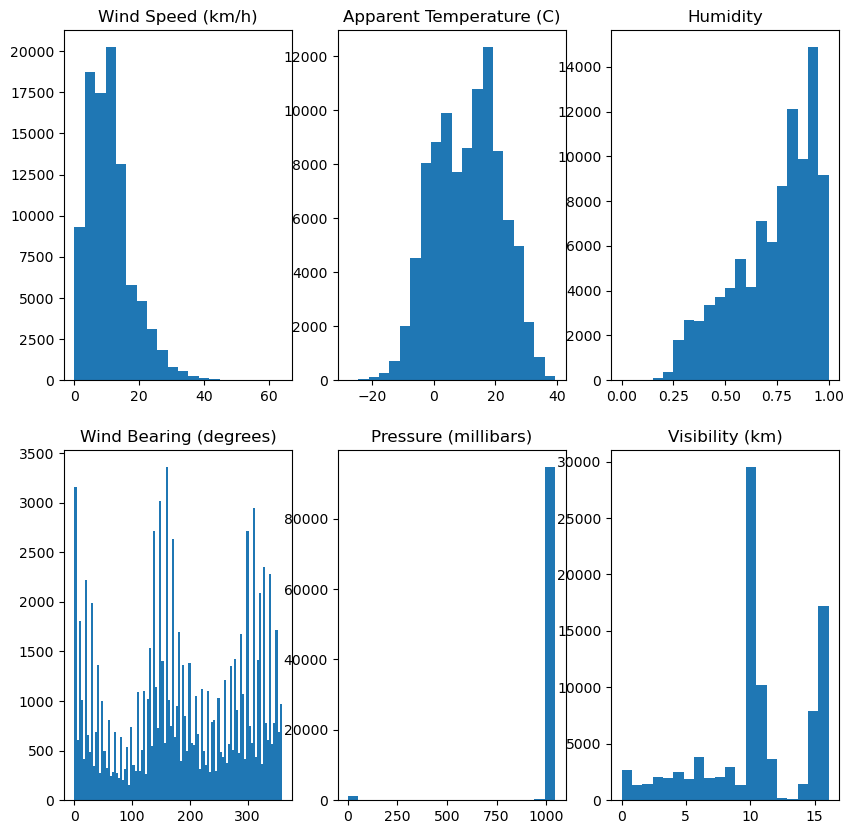

In [85]:
plt.figure(figsize = (10,10))
plt.subplot()
plt.subplot(2,3,1)
plt.title('Wind Speed (km/h)')
plt.hist(x = 'Wind Speed (km/h)',bins =20,data = weather)

plt.subplot(2,3,2)
plt.title('Apparent Temperature (C)')
plt.hist(x = 'Apparent Temperature (C)',bins =20,data = weather)

plt.subplot(2,3,3)
plt.title('Humidity')
plt.hist(x = 'Humidity',bins =20,data = weather)

plt.subplot(2,3,4)
plt.title('Wind Bearing (degrees)')
plt.hist(x = 'Wind Bearing (degrees)',bins =100,data = weather)

plt.subplot(2,3,5)
plt.title('Pressure (millibars)')
plt.hist(x = 'Pressure (millibars)',bins =20,data = weather)

plt.subplot(2,3,6)
plt.title('Visibility (km)')
plt.hist(x = 'Visibility (km)',bins =20,data = weather)


plt.show()


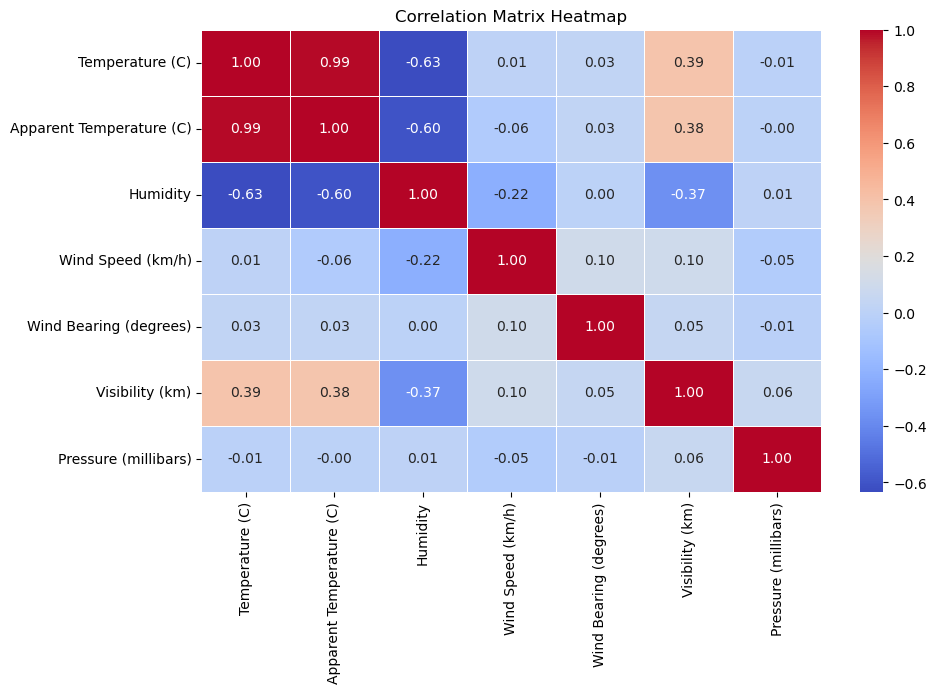

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(weather.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

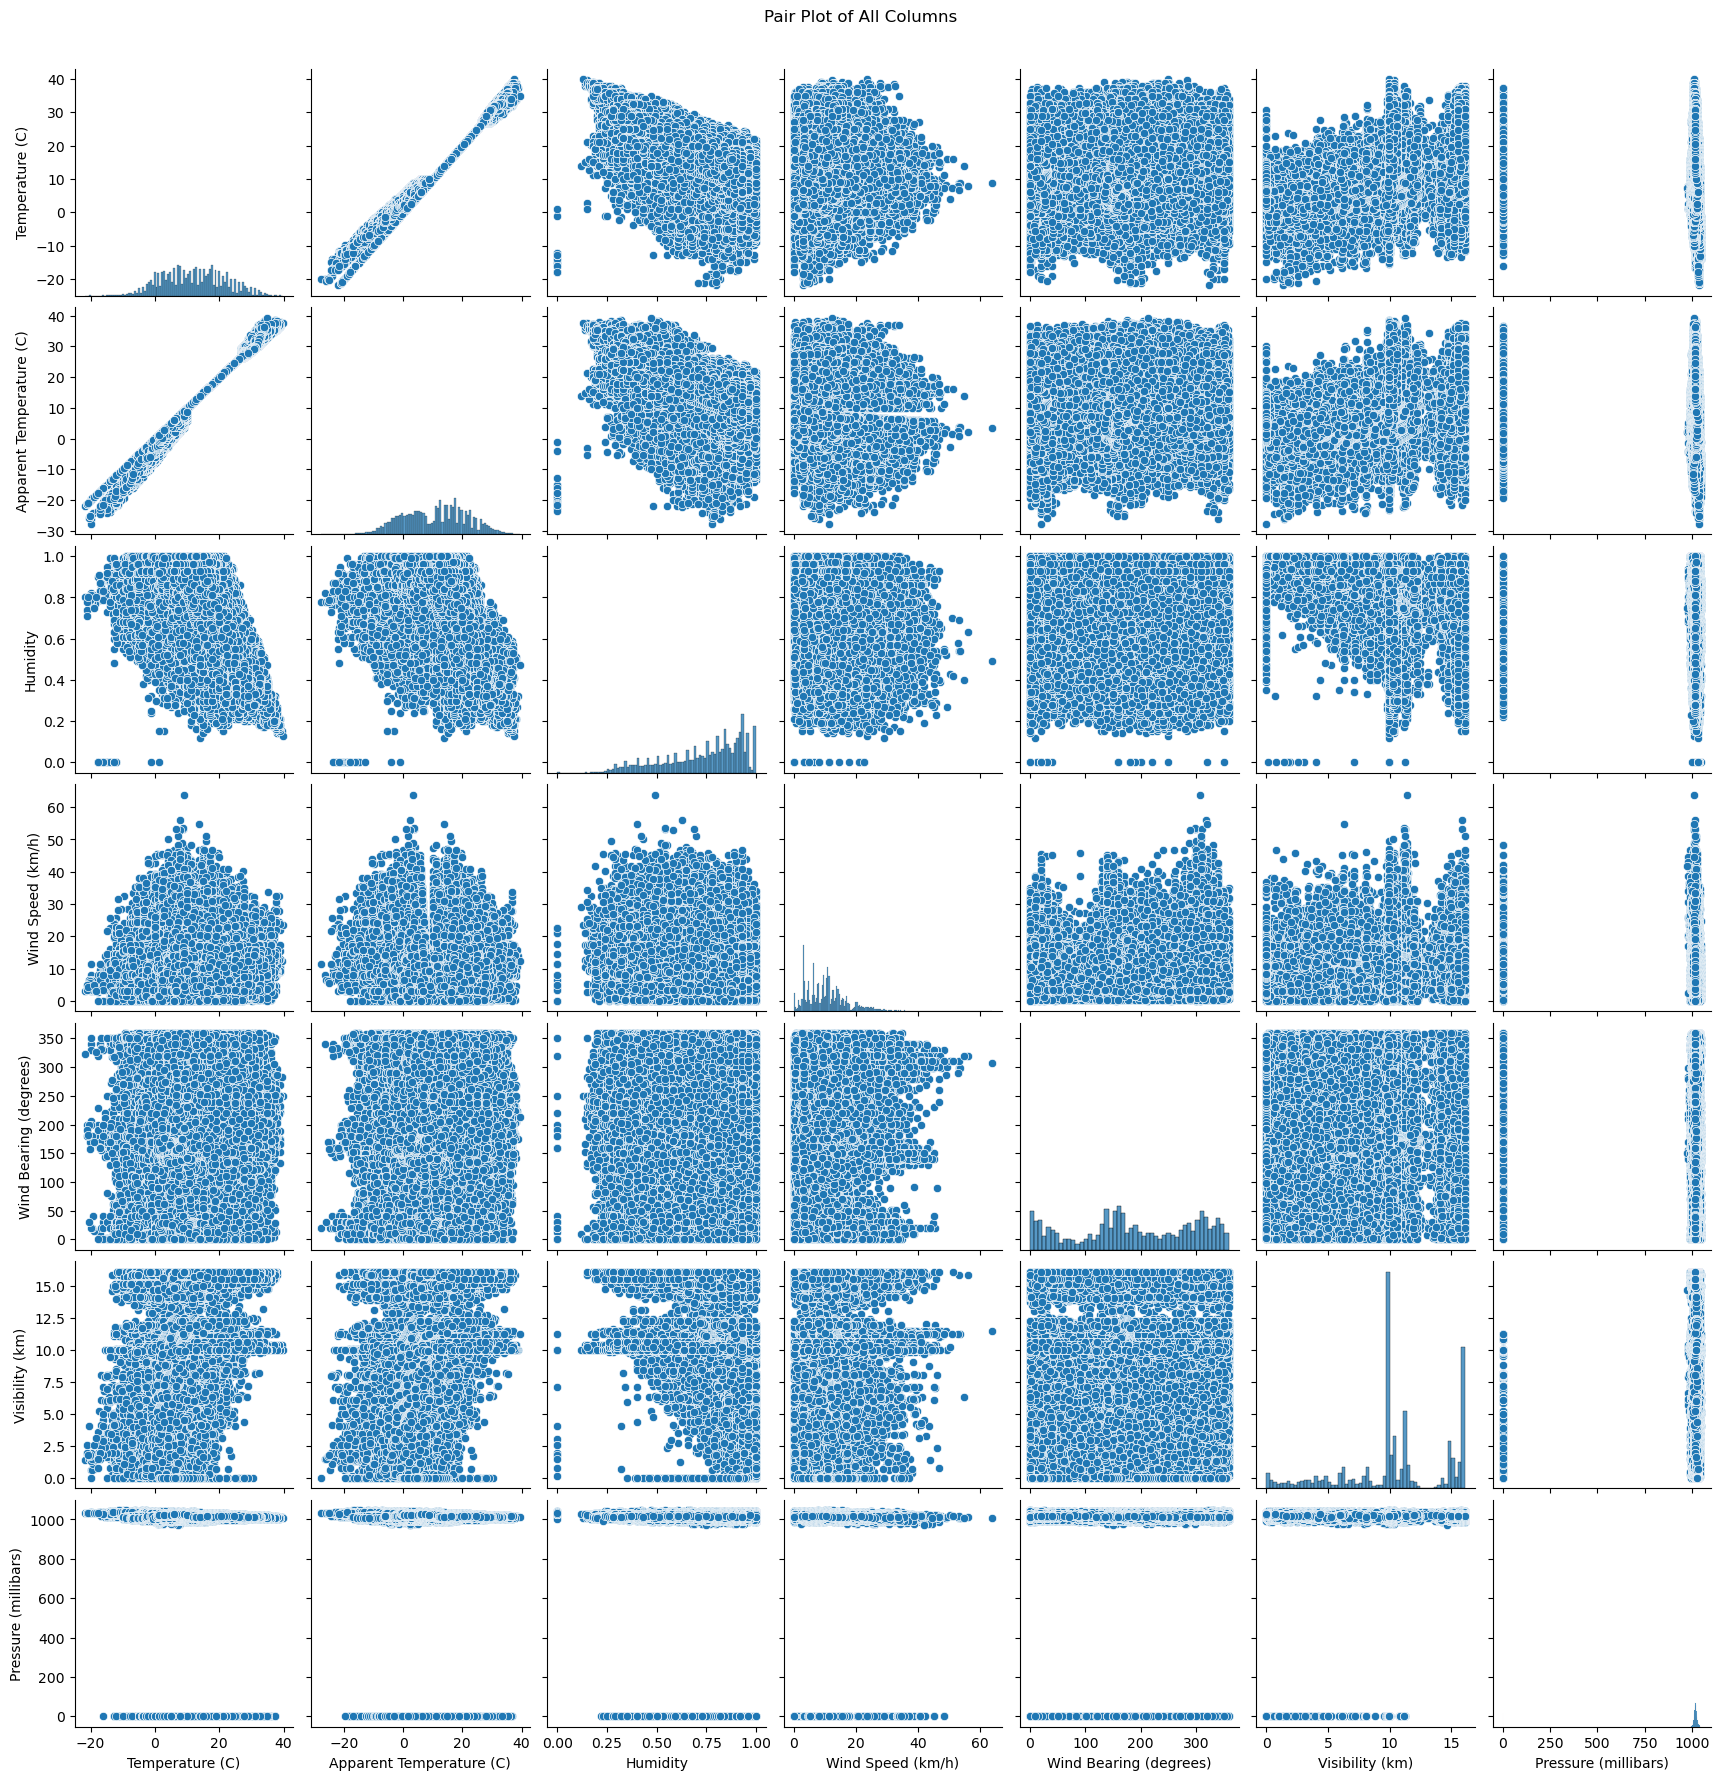

In [87]:
sns.pairplot(weather)
plt.suptitle("Pair Plot of All Columns", y=1.02)
plt.show()

### Building Our Model

Define X and Y

In [88]:
weather_X = weather.drop('Temperature (C)', axis=1)
weather_y = weather['Temperature (C)']

In [89]:
weather_X

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [90]:
weather_y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

###### Train / Test Split Data

In [91]:
X_train, X_test, y_train, y_test = train_test_split(weather_X,weather_y,test_size=0.2) 

In [92]:
weather.shape

(96453, 7)

In [93]:
X_test.shape

(19291, 6)

In [94]:
X_train.shape

(77162, 6)

###### Model Training and Predicting

In [104]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
pre = model.predict(X_test)
pre

array([18.46723745,  3.9682019 , 25.71620289, ..., 13.49955271,
        6.72560996, 24.33238408])

###### Model Evaluation

In [112]:
# Model Accuracy 
model.score(X_test,y_test )

0.9899417877965424

In [116]:
# Calculate R-squared (R^2)
r2 = r2_score(y_test,pre)
r2

0.9899417877965424

In [117]:
# Calculate Mean Absolute Error (MAE)
mea = mean_absolute_error(y_test,pre)
mea

0.7434025433208888